<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [1]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



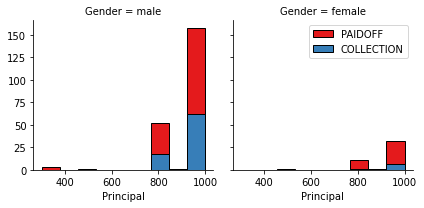

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

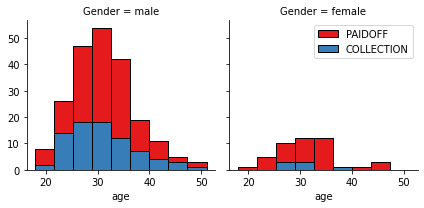

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


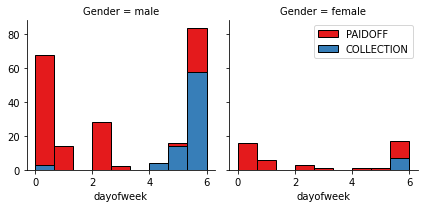

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [54]:
# Additional libraries are imported as follows
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.tree as tree
import scipy.optimize as opt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression

# log Loss, need  of 0 for PAIDOFF (no default) and 1 for COLLECTION (default) as per requirement
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
y = df['loan_status'].values

# Creating test and training datasets as follows

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('train set is as follows:', X_train.shape,  y_train.shape)
print ('test set is as follows:', X_test.shape,  y_test.shape)


train set is as follows: (276, 8) (276,)
test set is as follows: (70, 8) (70,)


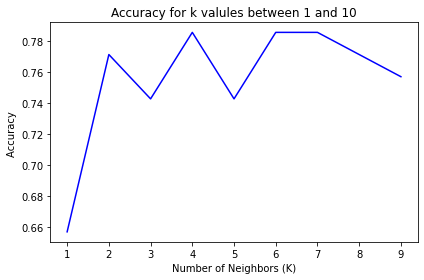

In [55]:
# running an iterative model to measure what is the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

#Training Model and Predicting for each k value as follows
for n in range(1,Ks):
    #Training Model and Predicting
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn_iter=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn_iter)  
    std_acc[n-1]=np.std(yhat_knn_iter==y_test)/np.sqrt(yhat_knn_iter.shape[0])
#generate a plot for the different k values to see which one is the best.
plt.plot(range(1,Ks),mean_acc,color='blue')
plt.title('Accuracy for k valules between 1 and 10')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

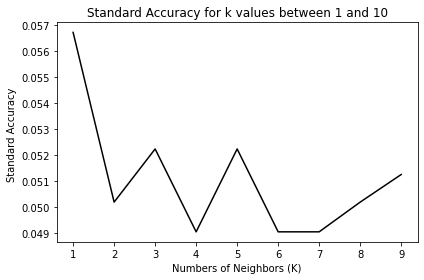

In [56]:
#generating a plot for the different k's values to check which one could be the best.
plt.plot(range(1,Ks),std_acc,color='black')
plt.title('Standard Accuracy for k values between 1 and 10')
plt.ylabel('Standard Accuracy ')
plt.xlabel('Numbers of Neighbors (K)')
plt.tight_layout()
plt.show()

checking with k==7

In [27]:
# build the model with k=7
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)
print("Accuracy of the k-nearest neighbor with k=7: ", metrics.accuracy_score(y_test, yhat_knn))

Accuracy of the k-nearest neighbor with k=7:  0.7857142857142857


checking with k==10

In [28]:
# build the model with k=10
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
yhat_knn=neigh.predict(X_test)
print("Accuracy of the k-nearest neighbor with k=10: ", metrics.accuracy_score(y_test, yhat_knn))

Accuracy of the k-nearest neighbor with k=10:  0.7571428571428571


# Decision Tree


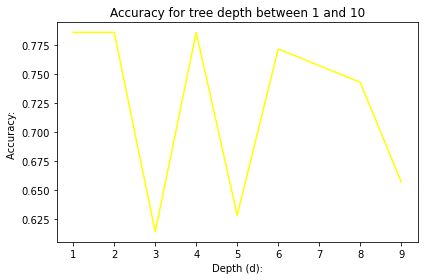

In [57]:
# running an iterative model to check what could be the best depth
ds = 10
mean_acc = np.zeros((ds-1))

#Training Model and Predicting for each k value  
for n in range(1,ds):
    #Training Model and Predicting  
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat_tree_iter=tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_tree_iter)  
    
 #generating a plot for the different k values to check which one could be the best.
plt.plot(range(1,ds),mean_acc,color='yellow')
plt.title('Accuracy for tree depth between 1 and 10')
plt.ylabel('Accuracy: ')
plt.xlabel('Depth (d):')
plt.tight_layout()
plt.show()   


In [58]:
#Making the tree and fitting the model using d=2. Then will be making the predictions and will be checking the accuracy
loanTree=DecisionTreeClassifier(criterion="entropy", max_depth = 2)
loanTree.fit(X_train,y_train)
predTree=loanTree.predict(X_test)
print("Accuracy of the DecisionTrees: ", metrics.accuracy_score(y_test, predTree))

Accuracy of the DecisionTrees:  0.7857142857142857


# Support Vector Machine


In [34]:
from sklearn.metrics import f1_score

In [59]:
#Building the model and making the predictions
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

kernel: linear, the f1 score is: 0.6914285714285714
kernel: poly, the f1 score is: 0.7064793130366899
kernel: rbf, the f1 score is: 0.7275882012724117
kernel: sigmoid, the f1 score is: 0.6953867388649997


In [61]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat_svm=clf.predict(X_test)

#checking accuracy of the SVM is as follows, check below command for the same
print("The Accuracy of the Support Vector Machine is: ", metrics.accuracy_score(y_test, yhat_svm))

The Accuracy of the Support Vector Machine is:  0.7428571428571429


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function will print and plot the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix is")
    else:
        print('Confusion matrix, without normalization is')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label:')
    plt.xlabel('Predicted label:')
print(confusion_matrix(y_test, yhat_svm, labels=[1,0]))

[[ 4 11]
 [ 7 48]]


Confusion matrix, without normalization is
[[48  7]
 [11  4]]


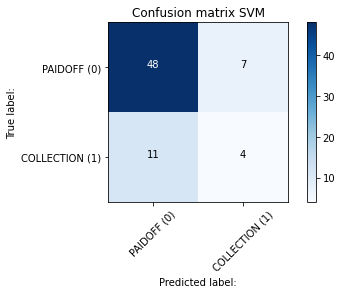

In [64]:
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

# Plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['PAIDOFF (0)','COLLECTION (1)'],normalize= False,  title='Confusion matrix SVM')

# Logistic Regression


In [65]:
cs = 10
mean_acc = np.zeros((cs-1))

#Training Model and Predicting for each k value  is as follows, check below code for the following
for n in range(1,cs):
    #Training Model and Predicting  
    c_div=n/100
    LR = LogisticRegression(C=c_div, solver='liblinear').fit(X_train,y_train)
    yhat_lr_iter=LR.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_lr_iter)  
    print(mean_acc)

[0.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.69 0.73 0.   0.   0.   0.   0.   0.   0.  ]
[0.69 0.73 0.73 0.   0.   0.   0.   0.   0.  ]
[0.69 0.73 0.73 0.73 0.   0.   0.   0.   0.  ]
[0.69 0.73 0.73 0.73 0.74 0.   0.   0.   0.  ]
[0.69 0.73 0.73 0.73 0.74 0.74 0.   0.   0.  ]
[0.69 0.73 0.73 0.73 0.74 0.74 0.74 0.   0.  ]
[0.69 0.73 0.73 0.73 0.74 0.74 0.74 0.74 0.  ]
[0.69 0.73 0.73 0.73 0.74 0.74 0.74 0.74 0.74]


In [66]:
#creating the model and making the prediction is as follows, check the below code for the results
# the best C we found is = 0.05

LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("The Accuracy of the Logistic Regression: ", metrics.accuracy_score(y_test, yhat_lr))

The Accuracy of the Logistic Regression:  0.7428571428571429


Confusion matrix, without normalization is
[[50  5]
 [13  2]]


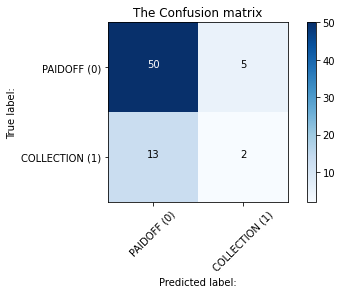

In [67]:
cnf_matrix_lr = confusion_matrix(y_test, yhat_lr, labels=[0,1])
np.set_printoptions(precision=2)

# Plotting non-normalized confusion matrix is as follows, check below code
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['PAIDOFF (0)','COLLECTION (1)'],normalize= False,  title='The Confusion matrix')

# Model Evaluation using Test set


In [43]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [45]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [46]:
test_df = pd.read_csv('loan_test.csv')
test_df.shape

(54, 10)

In [68]:
#redo-ing all of the processing done on the original dataset,check below code
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_eval = Feature
X_eval= preprocessing.StandardScaler().fit(X_eval).transform(X_eval)
X_eval[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [69]:
y_eval = test_df['loan_status'].values
y_eval[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [70]:
#Models are already built -- use them to predict y_eval from X_eval

yhat_eval_knn=neigh.predict(X_eval)
yhat_eval_svm= clf.predict(X_eval)
yhat_eval_tree=loanTree.predict(X_eval)
yhat_eval_logreg=LR.predict(X_eval)
yhat_eval_logreg_proba=LR.predict_proba(X_eval)

In [71]:
print('F1 score for knn is as follows: ',f1_score(y_eval, yhat_eval_knn, average='weighted'))
print('Jaccard score for knn is as follows: ', jaccard_score(y_eval, yhat_eval_knn,pos_label=0))

F1 score for knn is as follows:  0.7001989201477693
Jaccard score for knn is as follows:  0.7


In [72]:
print('F1 score for svm is as follows: ',f1_score(y_eval, yhat_eval_svm, average='weighted'))
print('Jaccard score for svm is as follows: ', jaccard_score(y_eval, yhat_eval_svm,pos_label=0))

F1 score for svm is as follows:  0.7583503077293734
Jaccard score for svm is as follows:  0.78


In [73]:
print('F1 score for Decision Tree is as follows: ',f1_score(y_eval, yhat_eval_tree, average='weighted'))
print('Jaccard score for Decision Tree is as follows: ', jaccard_score(y_eval, yhat_eval_tree,pos_label=0))

F1 score for Decision Tree is as follows:  0.6304176516942475
Jaccard score for Decision Tree is as follows:  0.7407407407407407


In [53]:
print('F1 score for logistical regression is as follows: ',f1_score(y_eval, yhat_eval_logreg, average='weighted'))
print('ThJaccard score for logistrical regression is as follows: ', jaccard_score(y_eval, yhat_eval_logreg,pos_label=0))

print('The Log Loss score is: ', log_loss(y_eval, yhat_eval_logreg_proba))

The F1 score for logistical regression is:  0.6717642373556352
The Jaccard score for logistrical regression is:  0.7547169811320755
The Log Loss score is:  0.4927898602000301


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
